In [392]:
from __future__ import print_function

import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import datasets, neighbors, linear_model, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.decomposition import PCA
import math
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

1. K-nearest neighbors classification
======================


Prepare dataset
--------------
First we will prepare the dataset. The dataset we choose is a modified  version of the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris). We choose only the first two input feature dimensions viz _sepal-length_ and _sepal-width_ (both in cm) for ease of visualization. 

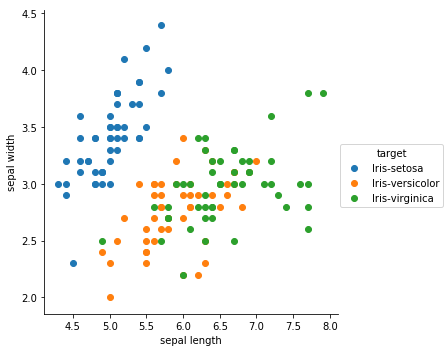

In [393]:
#load the Iris Data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# loading dataset into Pandas DataFrame
df = pd.read_csv(url
                 , names=['sepal length','sepal width','petal length','petal width','target'])
#Plot the entire data
sns.FacetGrid(df, hue="target", size=5) \
   .map(plt.scatter, "sepal length", "sepal width") \
   .add_legend()


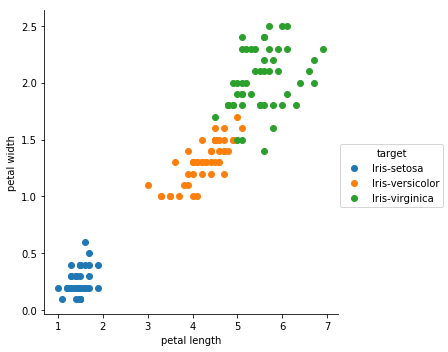

In [394]:
sns.FacetGrid(df, hue="target", size=5) \
   .map(plt.scatter, "petal length", "petal width") \
   .add_legend()

In [395]:
#preprocessing the data
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 4].values  

In [396]:
#split the irish dataset into test and training set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [397]:
#scale the features
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [398]:
#Use PCA to reduce dimensionality from 4 to 2
pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_train = pca_model.transform(X_train)
X_test = pca_model.transform(X_test)
inf = float("inf")

Use k-Nearest Neighbor (k-NN) algorithm to classify those test/target data points into proper species/classes.

Consider using different values for k (1, 3, 9).

For each value of k, consider different distance metric (n=1,2,infinity) with the following general distance measure or norm:
                    distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))

where p, q are two data points, d is the number of dimensions or features of each data point.

In [399]:
#Train the dataset using K-NN Algorithm
classifier = KNeighborsClassifier(n_neighbors=9, metric='euclidean',p=inf)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=9, p=inf,
           weights='uniform')

In [400]:
print(y_test)

['Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa']


In [401]:
#make predictions of our test set
y_pred = classifier.predict(X_test)  
print(y_pred)

['Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa']


In [402]:
#evaluating the algorithm
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0  8  1]
 [ 0  2  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.88      0.78      0.82         9

    avg / total       0.90      0.90      0.90        30

